In [8]:
# Load required libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)

New names:
• `` -> `...1`


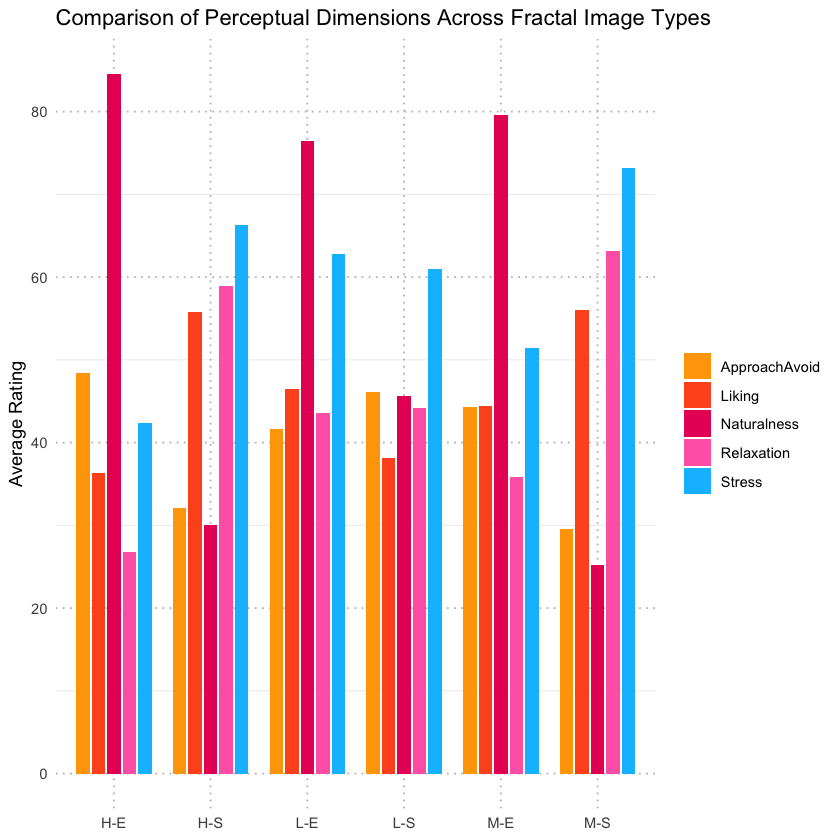

In [15]:
# Load the Excel file
file_path <- "/Users/izabelapuddlejumper/Desktop/rating.xlsx"  # <-- Change this path if needed
df <- read_excel(file_path)

# Rename relevant columns for readability
column_mapping <- c(
  'v_130' = 'A1_Liking', 'v_131' = 'A1_Naturalness', 'v_143' = 'A1_ApproachAvoid', 'v_134' = 'A1_Stress', 'v_135' = 'A1_Relaxation',
  'v_136' = 'A2_Liking', 'v_137' = 'A2_Naturalness', 'v_144' = 'A2_ApproachAvoid', 'v_139' = 'A2_Stress', 'v_140' = 'A2_Relaxation',
  'v_141' = 'A3_Liking', 'v_142' = 'A3_Naturalness', 'v_145' = 'A3_ApproachAvoid', 'v_146' = 'A3_Stress', 'v_147' = 'A3_Relaxation',
  'v_148' = 'B1_Liking', 'v_149' = 'B1_Naturalness', 'v_150' = 'B1_ApproachAvoid', 'v_151' = 'B1_Stress', 'v_152' = 'B1_Relaxation',
  'v_153' = 'B2_Liking', 'v_154' = 'B2_Naturalness', 'v_155' = 'B2_ApproachAvoid', 'v_156' = 'B2_Stress', 'v_157' = 'B2_Relaxation',
  'v_158' = 'B3_Liking', 'v_159' = 'B3_Naturalness', 'v_160' = 'B3_ApproachAvoid', 'v_161' = 'B3_Stress', 'v_162' = 'B3_Relaxation'
)
colnames(df) <- dplyr::recode(colnames(df), !!!column_mapping)

# rename the first column to 'ID'
colnames(df)[1] <- 'ID'
df_data <- df

# Prepare dimensions and image types
dimensions <- c('Liking', 'Naturalness', 'ApproachAvoid', 'Stress', 'Relaxation')
old_labels <- c('A1', 'A2', 'A3', 'B1', 'B2', 'B3')
new_labels <- c('L-E', 'M-E', 'H-E', 'L-S', 'M-S', 'H-S')

# Collect mean values per dimension per image type
plot_values <- lapply(dimensions, function(dim) {
  sapply(old_labels, function(img) {
    col_name <- paste0(img, "_", dim)
    mean(df[[col_name]], na.rm = TRUE)
  })
})
names(plot_values) <- dimensions

# Prepare data for plotting
plot_data <- data.frame(
  ImageType = rep(new_labels, times = length(dimensions)),
  Dimension = rep(dimensions, each = length(new_labels)),
  Value = unlist(plot_values)
)

# Plot
ggplot(plot_data, aes(x = ImageType, y = Value, fill = Dimension)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), width = 0.7) +
  scale_fill_manual(values = c('orange', '#ff5722', '#e91e63', '#ff69b4', '#00bfff')) +
  labs(
    x = NULL,
    y = "Average Rating",
    title = "Comparison of Perceptual Dimensions Across Fractal Image Types"
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.grid.major = element_line(color = "gray", linetype = "dotted")
  ) 
  # ggsave("fractal_ratings_comparison_labeled.png", dpi = 300, width = 12, height = 6)

In [22]:
df_data

ID,A1_Liking,A1_Naturalness,A1_ApproachAvoid,A1_Stress,A1_Relaxation,A2_Liking,A2_Naturalness,A2_ApproachAvoid,A2_Stress,⋯,B2_Liking,B2_Naturalness,B2_ApproachAvoid,B2_Stress,B2_Relaxation,B3_Liking,B3_Naturalness,B3_ApproachAvoid,B3_Stress,B3_Relaxation
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N6FGR8,35,27,10,100,100,15,42,30,28,⋯,47,0,0,100,100,41,0,0,27,25
0DT2,40,20,29,51,21,30,100,30,40,⋯,0,21,100,10,0,20,70,41,21,9
Z2CN1H,70,59,8,55,50,90,51,9,96,⋯,2,10,74,7,6,25,10,40,49,41
AAU5L2,50,99,99,99,0,0,100,100,0,⋯,99,10,0,100,99,100,40,19,100,89
Y6WJKG,75,91,1,80,68,83,67,0,85,⋯,80,0,1,99,83,94,0,0,100,100
JGMJ5P,10,90,10,30,30,0,99,4,18,⋯,21,40,10,10,15,0,40,0,25,10
1L9FCD,71,92,19,76,31,56,100,38,100,⋯,33,10,4,90,40,4,13,19,93,19
KQT35L,2,95,91,0,9,7,89,80,8,⋯,26,39,50,67,59,50,20,20,94,80
V4JN59,50,99,0,49,50,100,100,50,100,⋯,50,0,50,100,100,0,0,99,99,100


In [24]:
# A1 = Low Exact; A2 = Medium Exact; A3 = High Exact
# B1 = Low Similar; B2 = Medium Similar; B3 = High Similar

# Convert it to long format, excluding the ID column
df_long <- df_data %>%
  pivot_longer(
    cols = -ID,  # Exclude the ID column
    names_to = c("ImageType", "Dimension"),
    names_sep = "_"
  ) %>%
  mutate(
    ImageType = factor(ImageType, levels = c("A1", "A2", "A3", "B1", "B2", "B3")),
    Dimension = factor(Dimension, levels = c("Liking", "Naturalness", "ApproachAvoid", "Stress", "Relaxation"))
  )

# Change image type labels
df_long$ImageType <- recode(df_long$ImageType,
                            "A1" = "L-E",
                            "A2" = "M-E",
                            "A3" = "H-E",
                            "B1" = "L-S",
                            "B2" = "M-S",
                            "B3" = "H-S")

# Create variable FD_level: Low, Medium, High
df_long$FD_level <- recode(df_long$ImageType,
                           "L-E" = "Low",
                           "M-E" = "Medium",
                           "H-E" = "High",
                           "L-S" = "Low",
                           "M-S" = "Medium",
                           "H-S" = "High")

# Create variable Fractal_type: Exact, Statistical
df_long$Fractal_type <- recode(df_long$ImageType,
                               "L-E" = "Exact",
                               "M-E" = "Exact",
                               "H-E" = "Exact",
                               "L-S" = "Statistical",
                               "M-S" = "Statistical",
                               "H-S" = "Statistical")

# Print head
head(df_long)

ID,ImageType,Dimension,value,FD_level,Fractal_type
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>
N6FGR8,L-E,Liking,35,Low,Exact
N6FGR8,L-E,Naturalness,27,Low,Exact
N6FGR8,L-E,ApproachAvoid,10,Low,Exact
N6FGR8,L-E,Stress,100,Low,Exact
N6FGR8,L-E,Relaxation,100,Low,Exact
N6FGR8,M-E,Liking,15,Medium,Exact


In [25]:
df_long

ID,ImageType,Dimension,value,FD_level,Fractal_type
<chr>,<fct>,<fct>,<dbl>,<fct>,<fct>
N6FGR8,L-E,Liking,35,Low,Exact
N6FGR8,L-E,Naturalness,27,Low,Exact
N6FGR8,L-E,ApproachAvoid,10,Low,Exact
N6FGR8,L-E,Stress,100,Low,Exact
N6FGR8,L-E,Relaxation,100,Low,Exact
N6FGR8,M-E,Liking,15,Medium,Exact
N6FGR8,M-E,Naturalness,42,Medium,Exact
N6FGR8,M-E,ApproachAvoid,30,Medium,Exact
N6FGR8,M-E,Stress,28,Medium,Exact


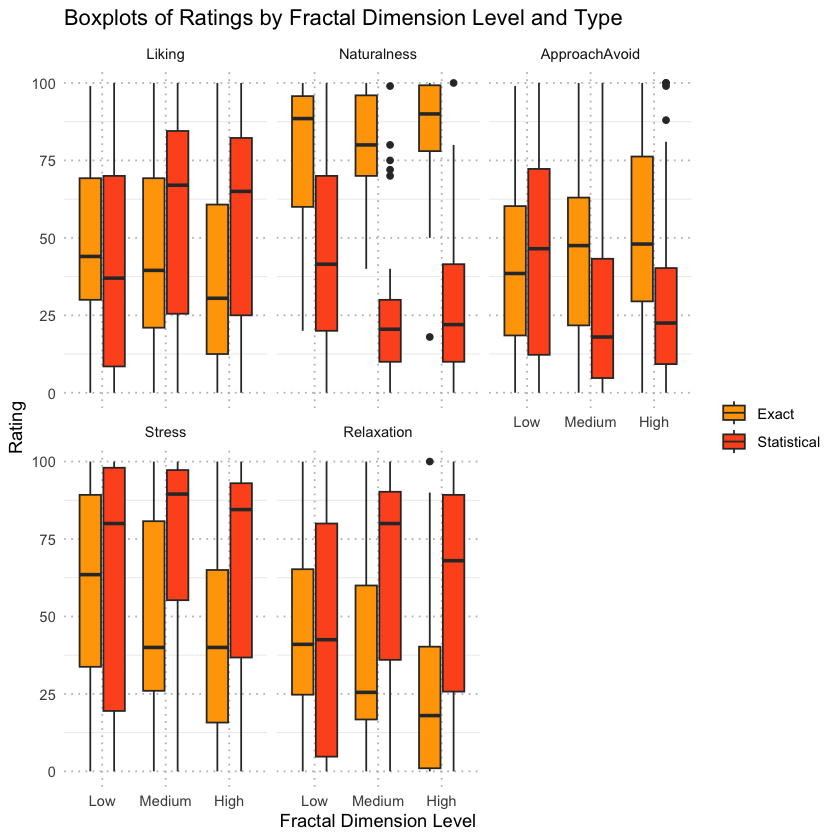

In [ ]:
# create boxplot value ~ FD_level x Fractal_type wrap by Dimension

ggplot(df_long, aes(x = FD_level, y = value, fill = Fractal_type)) +
  geom_boxplot() +
  facet_wrap(~ Dimension) +
  scale_fill_manual(values = c('orange', '#ff5722')) +
  labs(
    x = "Fractal Dimension Level",
    y = "Rating",
    title = "Boxplots of Ratings by Fractal Dimension Level and Type"
  ) +
  theme_minimal() +
  theme(
    legend.title = element_blank(),
    panel.grid.major = element_line(color = "gray", linetype = "dotted")
  )






